In [4]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([1,2,3,4,5,6,7,8,9,10])
y = np.array([0,0,0,0,1,1,1,1,1,1])

def sigmoid(z):
   return 1/(1 + np.exp(-z))

w = 0
lr = 0.1
b = 0
epochs = 1000
loss_history = []
for i in range(epochs):
  z = w * x + b
  y_pred = sigmoid(z)
  #Binary cross-entropy
  loss = -np.mean(y * np.log(y_pred + 1e-7) + (1 - y) * np.log(1 - y_pred + 1e-7))
  loss_history.append(loss)
  #Gradient calculation
  dw = np.dot((y_pred - y), x) / len(x)
  db = np.mean(y_pred - y)
  #Update weights
  w -= lr * dw
  b -= lr * db

  if i % 100 == 0:
    print(f"Epoch {i}: Loss {loss:.4f}")

def predict(x):
  return sigmoid(w * x + b) >= 0.5
y_pred_final = predict(x)
accuracy = np.mean(y_pred_final == y)

Epoch 0: Loss 0.6931
Epoch 100: Loss 0.3511
Epoch 200: Loss 0.2718
Epoch 300: Loss 0.2278
Epoch 400: Loss 0.1999
Epoch 500: Loss 0.1804
Epoch 600: Loss 0.1659
Epoch 700: Loss 0.1547
Epoch 800: Loss 0.1456
Epoch 900: Loss 0.1380


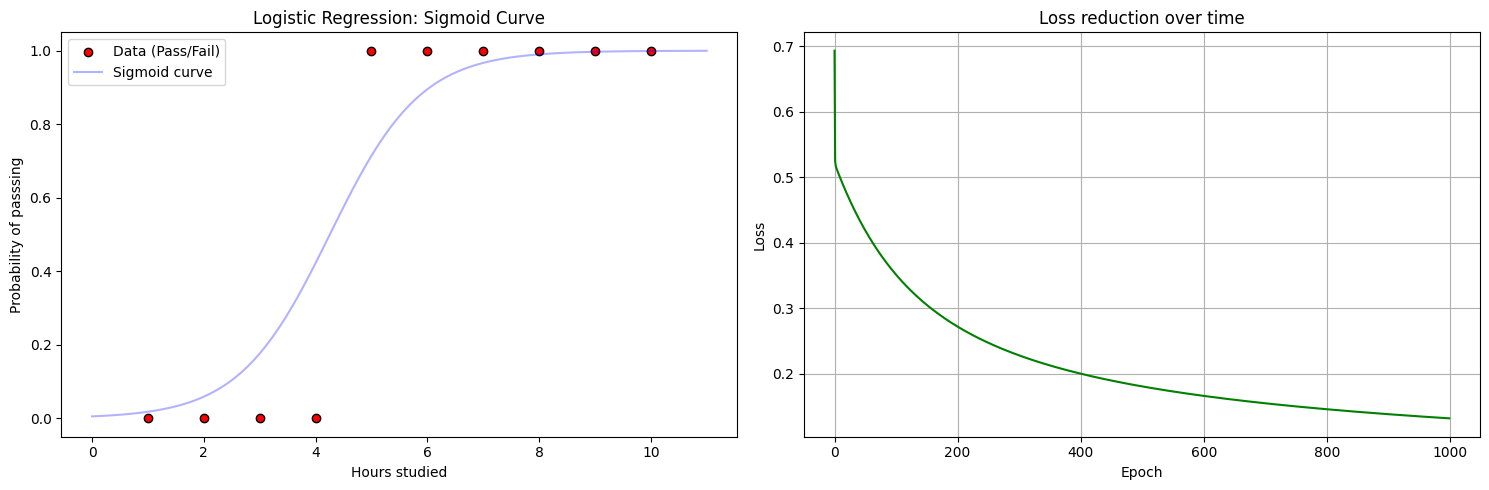

In [9]:
x_line = np.linspace(0,11,100)
y_line = sigmoid(w * x_line + b)
#Plottting
plt.figure(figsize = (15,5))

#Sigmoid curve
plt.subplot(1,2,1)
plt.scatter(x, y, color = "red", label = "Data (Pass/Fail)", edgecolors = "black")
plt.plot(x_line, y_line, color = "blue", label = "Sigmoid curve", alpha = 0.3)
plt.xlabel("Hours studied")
plt.ylabel("Probability of passsing")
plt.title("Logistic Regression: Sigmoid Curve")
plt.legend()
#Loss over epoch
plt.subplot(1,2,2)
plt.plot(range(epochs), loss_history, color = "green")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss reduction over time")
plt.grid(True)
plt.tight_layout()
plt.show()